In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Overview data

In [2]:
df = pd.read_csv('/Users/viktor_korotkov/Downloads/data.csv')
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

## Drop odd data

In [4]:
df.drop(df.columns[[3, 5, 6, 7, 8, 9, 10]], 
    axis = 1, inplace = True
)

In [5]:
df.rename(columns = {'Engine HP' : 'Horsepower',
    'highway MPG' : 'Highway-mpg', 'city mpg' : 'City-mpg',
    'Vehicle Style' : 'Vehicle-style'
    }, inplace = True
)

In [6]:
df

,Make,Model,Year,Horsepower,Vehicle-style,Highway-mpg,City-mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,300.0,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,300.0,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,300.0,4dr Hatchback,23,16,204,50920


In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df

,Make,Model,Year,Horsepower,Vehicle-style,Highway-mpg,City-mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,300.0,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,300.0,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,300.0,4dr Hatchback,23,16,204,50920


In [9]:
df.isnull().sum()

Make              0
Model             0
Year              0
Horsepower       69
Vehicle-style     0
Highway-mpg       0
City-mpg          0
Popularity        0
MSRP              0
dtype: int64

In [10]:
df['Horsepower'].fillna(np.mean(df['Horsepower']), inplace = True)

/var/folders/tp/gy9j_7c501b2yn7ftg_bpxp40000gn/T/ipykernel_59908/1025721330.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Horsepower'].fillna(np.mean(df['Horsepower']), inplace = True)


In [11]:
df.isnull().sum()

Make             0
Model            0
Year             0
Horsepower       0
Vehicle-style    0
Highway-mpg      0
City-mpg         0
Popularity       0
MSRP             0
dtype: int64

## Detect outliers

<Axes: >

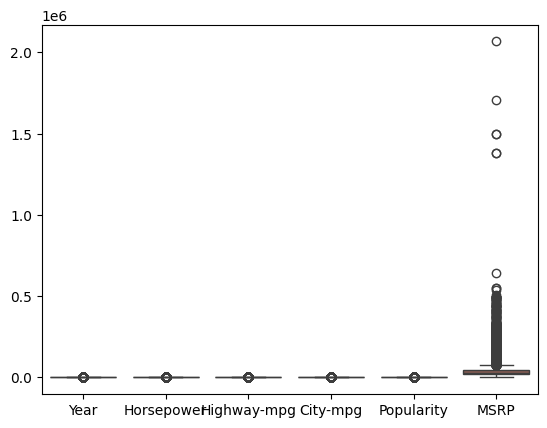

In [12]:
sns.boxplot(df)

<Axes: ylabel='Year'>

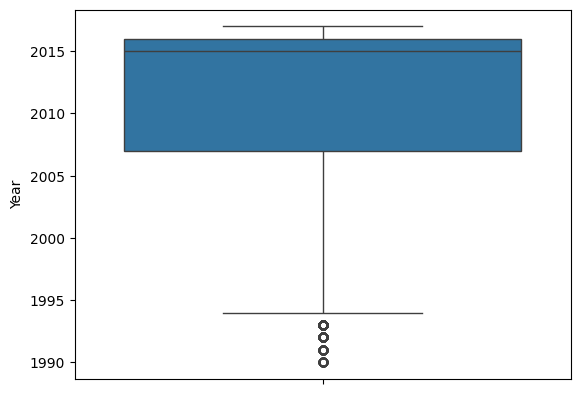

In [13]:
sns.boxplot(df['Year'])

<Axes: ylabel='Horsepower'>

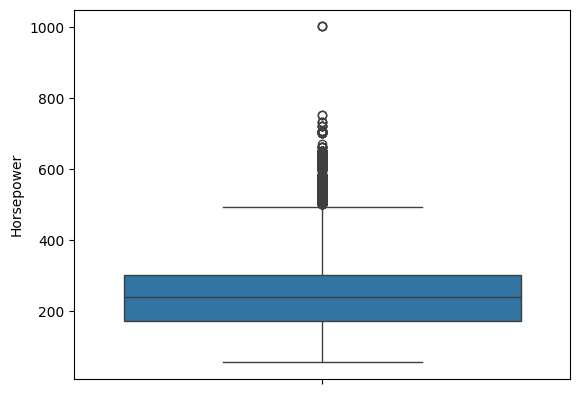

In [14]:
sns.boxplot(df['Horsepower'])

<Axes: ylabel='City-mpg'>

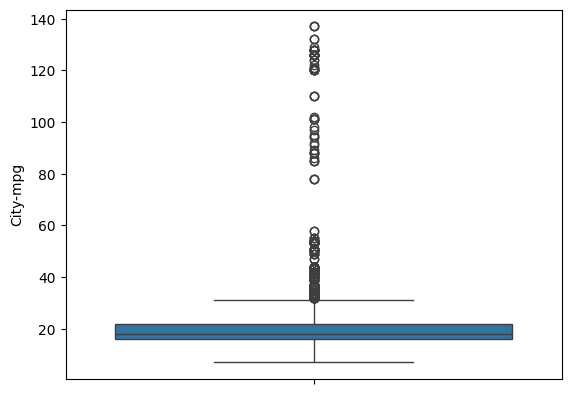

In [15]:
df = df[df['Horsepower'] < 900]
sns.boxplot(df['City-mpg'])

<Axes: ylabel='Highway-mpg'>

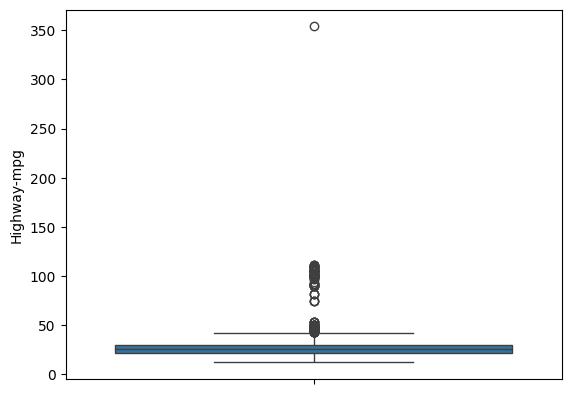

In [16]:
sns.boxplot(df['Highway-mpg'])

<Axes: ylabel='Popularity'>

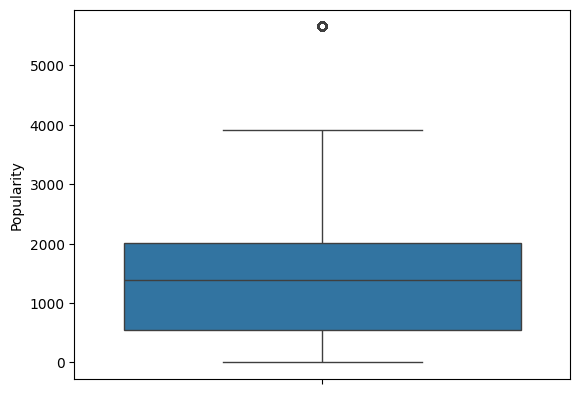

In [17]:
df = df[df['Highway-mpg'] < 200]
sns.boxplot(df['Popularity'])

<Axes: ylabel='MSRP'>

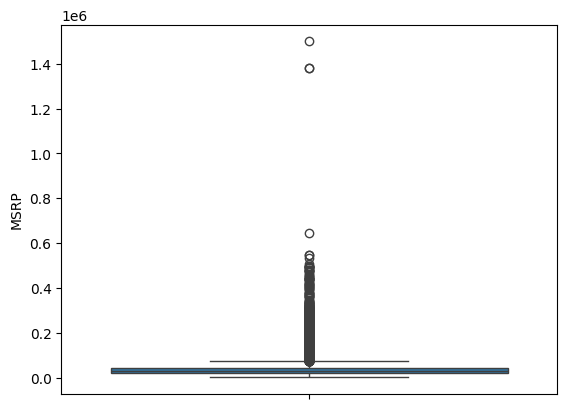

In [18]:
df = df[df['Popularity'] < 3500]
sns.boxplot(df['MSRP'])

In [19]:
df = df[df['MSRP'] < 800000]

## Univariate analysis

In [20]:
df.head(5)

,Make,Model,Year,Horsepower,Vehicle-style,Highway-mpg,City-mpg,Popularity,MSRP
17,Audi,100,1992,172.0,Sedan,24,17,3105,2000
19,Audi,100,1992,172.0,Wagon,20,16,3105,2000
21,Audi,100,1992,172.0,Sedan,21,16,3105,2000
22,Audi,100,1993,172.0,Sedan,24,17,3105,2000
23,Audi,100,1993,172.0,Wagon,20,16,3105,2000


### Make

In [22]:
px.pie(df, names = 'Make')

In [31]:
df['Make'].describe()

count          9936
unique           45
top       Chevrolet
freq           1078
Name: Make, dtype: object

### Model

In [24]:
px.pie(df, names = 'Model')

In [32]:
df['Model'].describe()

count               9936
unique               823
top       Silverado 1500
freq                 156
Name: Model, dtype: object

### Year

In [28]:
px.box(df, x = 'Year')

In [33]:
df['Year'].describe()

count    9936.000000
mean     2010.637983
std         7.226864
min      1990.000000
25%      2007.000000
50%      2015.000000
75%      2016.000000
max      2017.000000
Name: Year, dtype: float64

### Horsepower

In [36]:
px.box(df, x = 'Horsepower')

In [34]:
px.histogram(df, x = 'Horsepower')

In [35]:
df['Horsepower'].describe()

count    9936.000000
mean      250.122035
std       109.480677
min        55.000000
25%       170.000000
50%       231.000000
75%       301.000000
max       750.000000
Name: Horsepower, dtype: float64

### Vehicle style

In [37]:
px.pie(df, names = 'Vehicle-style')

In [38]:
df['Vehicle-style'].describe()

count      9936
unique       16
top       Sedan
freq       2629
Name: Vehicle-style, dtype: object

### Highway mpg

In [39]:
px.box(df, x = 'Highway-mpg')

In [40]:
px.histogram(df, x = 'Highway-mpg')

In [41]:
df['Highway-mpg'].describe()

count    9936.000000
mean       26.804147
std         8.388484
min        12.000000
25%        22.000000
50%        26.000000
75%        30.000000
max       110.000000
Name: Highway-mpg, dtype: float64

### City mpg

In [42]:
px.box(df, x = 'City-mpg')

In [43]:
px.histogram(df, x = 'City-mpg')

In [44]:
df['City-mpg'].describe()

count    9936.000000
mean       19.911534
std         9.122635
min         7.000000
25%        16.000000
50%        18.000000
75%        22.000000
max       132.000000
Name: City-mpg, dtype: float64

### Popularity

In [45]:
px.box(df, x = 'Popularity')

In [48]:
px.histogram(df, x = 'Popularity', cumulative = True)

In [47]:
df['Popularity'].describe()

count    9936.000000
mean     1142.131743
std       773.639917
min         2.000000
25%       481.000000
50%       873.000000
75%      1851.000000
max      3105.000000
Name: Popularity, dtype: float64

### Recommended price

In [49]:
px.box(df, x = 'MSRP')

In [52]:
px.histogram(df, x = 'MSRP', log_y = True)

In [53]:
df['MSRP'].describe()

count      9936.000000
mean      41463.207428
std       51906.452450
min        2000.000000
25%       21326.250000
50%       30100.000000
75%       42600.000000
max      643330.000000
Name: MSRP, dtype: float64

## Bivariate analysis

In [55]:
df.head(5)

,Make,Model,Year,Horsepower,Vehicle-style,Highway-mpg,City-mpg,Popularity,MSRP
17,Audi,100,1992,172.0,Sedan,24,17,3105,2000
19,Audi,100,1992,172.0,Wagon,20,16,3105,2000
21,Audi,100,1992,172.0,Sedan,21,16,3105,2000
22,Audi,100,1993,172.0,Sedan,24,17,3105,2000
23,Audi,100,1993,172.0,Wagon,20,16,3105,2000


In [58]:
px.histogram(df, x = ['Make', 'Vehicle-style'])

In [59]:
px.histogram(df, x = ['City-mpg', 'Highway-mpg'])

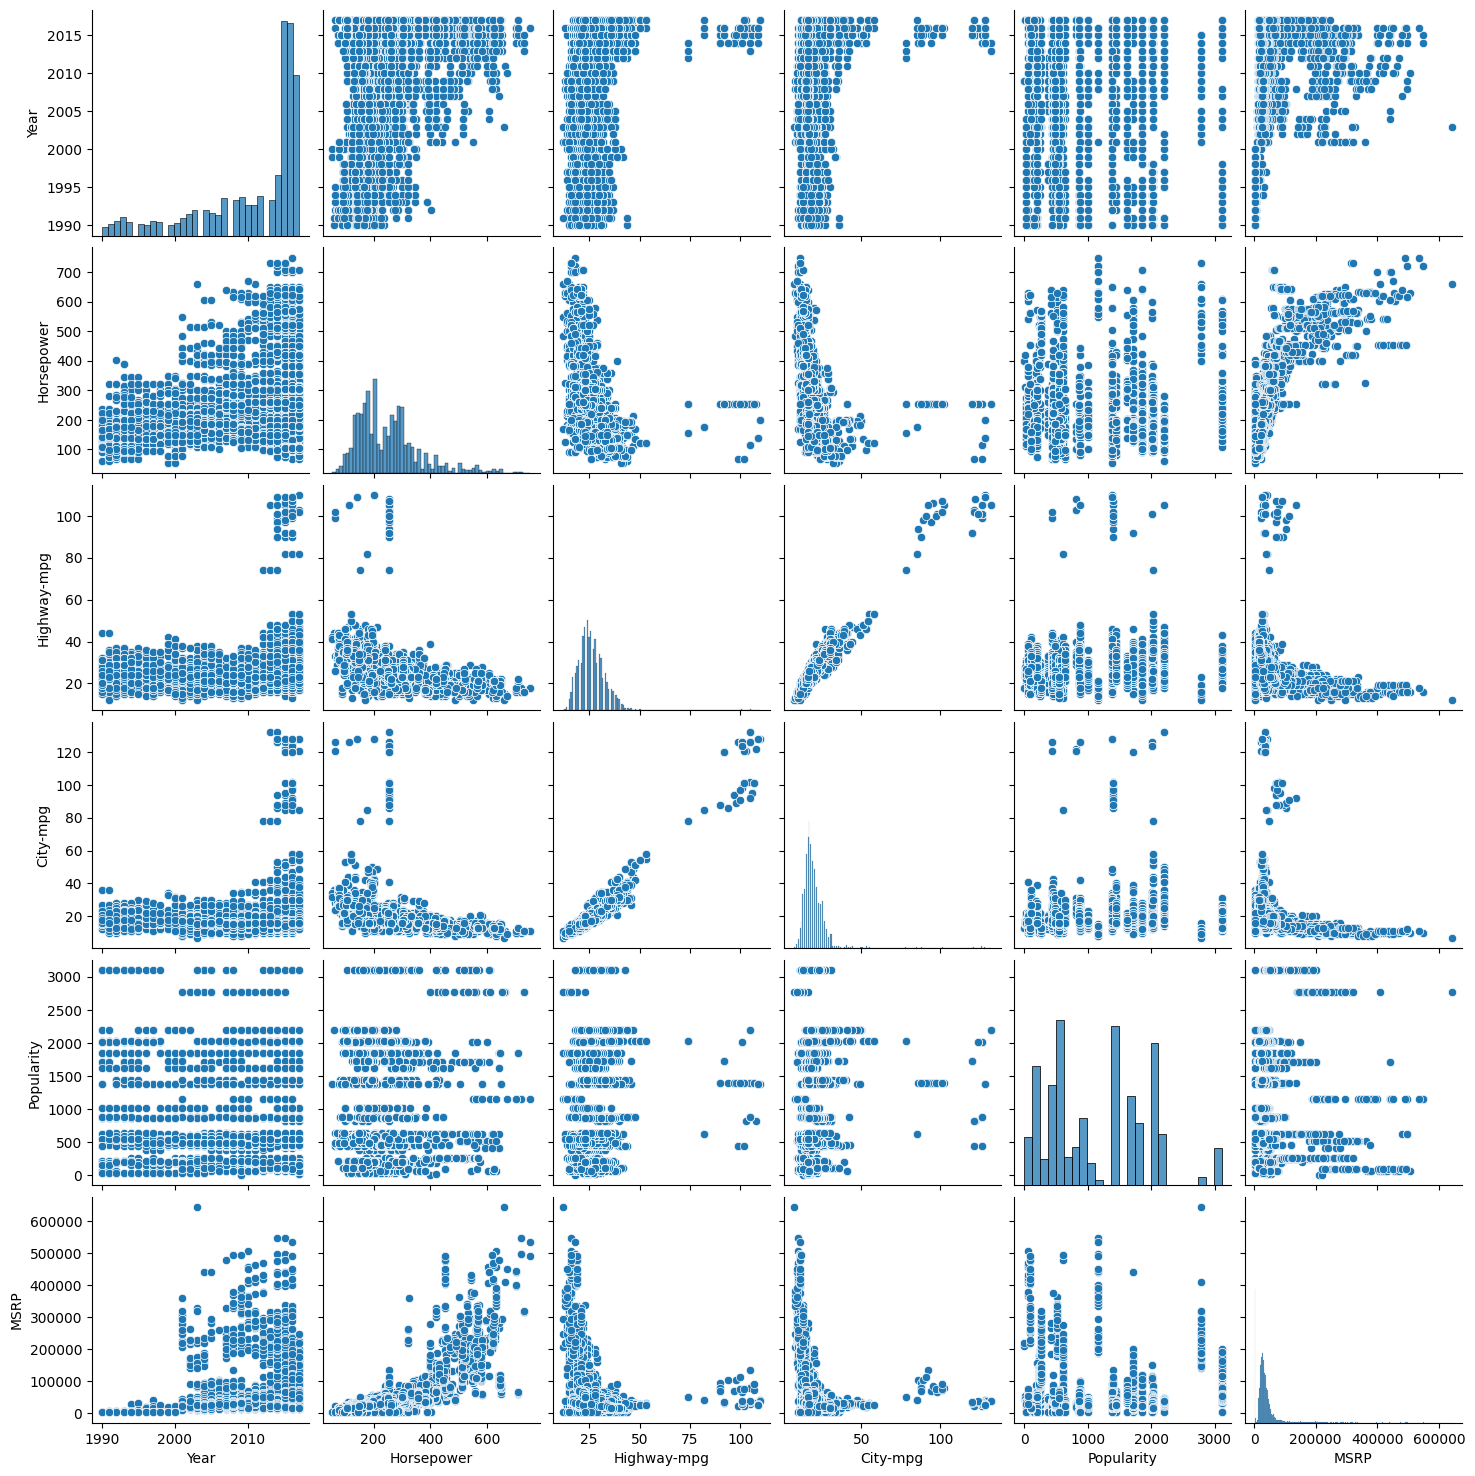

In [62]:
sns.pairplot(df)
plt.show()